In [2]:
import pandas as pd
from datetime import datetime 

In [3]:
M3 = pd.read_csv('/Users/ireneberros/Documents/model/Variables/ChangeMoneySupplyM3.csv', sep=';')
M3['Value'] = M3['Value'].apply(lambda x: x.replace('.', ''))
M3['Value_M3'] = M3['Value'].astype(int)
M3['TIME'] = pd.to_datetime(M3['TIME'])
M3['pct'] = M3['Value_M3'].pct_change()
M3.drop('Value_M3', axis=1, inplace=True)

M3 = M3[['TIME', 'pct']]
M3.columns = ['Date', 'Value_M3']
M3.dropna(inplace=True)

In [4]:
M3

,Date,Value_M3
1,2001-02-01,0.007718
2,2001-03-01,0.011547
3,2001-04-01,0.012599
4,2001-05-01,-0.000565
5,2001-06-01,0.007890
...,...,...
262,2022-11-01,-0.001605
263,2022-12-01,-0.001832
264,2023-01-01,-0.006822
265,2023-02-01,-0.006440


In [5]:
CPI = pd.read_csv('/Users/ireneberros/Documents/model/Variables/CPI.csv', sep=';')
CPI['Value'] = CPI['Value'].apply(lambda x: x.replace('.', ''))
CPI['Value_CPI'] = CPI['Value'].astype(int)
CPI['Date'] = pd.to_datetime(CPI['TIME'])

CPI['pct'] = CPI['Value_CPI'].pct_change()
CPI.drop('Value_CPI', axis=1, inplace=True)

CPI = CPI[['TIME', 'pct']]
CPI.columns = ['Date', 'Value_CPI']
CPI['Date'] = pd.to_datetime(CPI['Date'])

CPI.dropna(inplace=True)
CPI = CPI.iloc[0:267]

In [6]:
CPI[CPI['Date']>'2016-01-01']

,Date,Value_CPI
182,2016-02-01,-0.992588
183,2016-03-01,836.626449
184,2016-04-01,-0.986803
185,2016-05-01,8.059763
186,2016-06-01,8.784205
...,...,...
263,2022-11-01,-0.081997
264,2022-12-01,-0.092249
265,2023-01-01,-0.006856
266,2023-02-01,-0.058428


In [6]:
EFF = pd.read_excel('/Users/ireneberros/Documents/model/Variables/Effective Federal Funds Rate.xlsx')
EFF['Value'] = EFF['Value'].apply(lambda x: x.replace('%', ''))
EFF['Value']  = EFF['Value'].astype(float)
EFF['Date'] = EFF['Date'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))
EFF.columns = ['Date', 'Value_EFF']

EFF['Date'] = EFF['Date'].astype(str)
EFF['Date'] = EFF['Date'].apply(lambda x: f'{x[0:8]}01')
EFF['Date'] = pd.to_datetime(EFF['Date'])

In [7]:
EFF

,Date,Value_EFF
0,2023-04-01,4.83
1,2023-03-01,4.65
2,2023-02-01,4.57
3,2023-01-01,4.33
4,2022-12-01,4.10
...,...,...
95,2015-05-01,0.12
96,2015-04-01,0.12
97,2015-03-01,0.11
98,2015-02-01,0.11


In [8]:
SP500 = pd.read_excel('/Users/ireneberros/Documents/model/Variables/S_P 500 Monthly Return.xlsx')
SP500.drop(25, inplace=True)
SP500['Value'] = SP500['Value'].apply(lambda x: x.replace('%', ''))
SP500['Value']  = SP500['Value'].astype(float)
SP500['Date'] = SP500['Date'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))
SP500.columns = ['Date', 'Value_SP500']


SP500['Date'] = SP500['Date'].astype(str)
SP500['Date'] = SP500['Date'].apply(lambda x: f'{x[0:8]}01')
SP500['Date'] = pd.to_datetime(SP500['Date'])

In [9]:
SP500

,Date,Value_SP500
0,2023-04-01,1.46
1,2023-03-01,3.51
2,2023-02-01,-2.61
3,2023-01-01,6.18
4,2022-12-01,-5.90
...,...,...
121,2013-04-01,1.81
122,2013-03-01,3.60
123,2013-02-01,1.11
124,2013-01-01,5.04


In [10]:
TVL = pd.read_csv('/Users/ireneberros/Documents/model/Variables/TVL Daily.csv', sep=';', index_col='Protocol')
TVL = TVL.T

TVL['Total']  = TVL['Total'].astype(str)
TVL['Total'] = TVL['Total'].apply(lambda x: x.replace('.', ''))
TVL['Total']  = TVL['Total'].astype(int)

TVL['pct'] = TVL['Total'].pct_change()

TVL.drop('Total', axis=1, inplace=True)
TVL = TVL.dropna()

TVL['Date'] = pd.to_datetime(TVL.index)
TVL.reset_index(inplace=True)

TVL.drop('index', axis=1, inplace=True)
TVL.columns = ['pct_TVL', 'Date']

/var/folders/04/c5qth9sn7tl6p8klkw2g40m40000gn/T/ipykernel_35441/3069950620.py:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  TVL['Date'] = pd.to_datetime(TVL.index)


In [11]:
TVL

,pct_TVL,Date
0,0.552981,2018-08-17
1,-0.072797,2018-08-18
2,-0.042306,2018-08-19
3,0.016660,2018-08-20
4,-0.049097,2018-08-21
...,...,...
1724,8.737269,2023-07-05
1725,-0.901004,2023-08-05
1726,8.736016,2023-09-05
1727,-0.899464,2023-10-05


In [12]:
US_PCE = pd.read_excel('/Users/ireneberros/Documents/model/Variables/US PCE Price Index YoY.xlsx')
US_PCE['Value'] = US_PCE['Value'].apply(lambda x: x.replace('%', ''))
US_PCE['Value']  = US_PCE['Value'].astype(float)
US_PCE['Date'] = US_PCE['Date'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))
US_PCE.columns = ['Date', 'Value_USpce']


US_PCE['Date'] = US_PCE['Date'].astype(str)
US_PCE['Date'] = US_PCE['Date'].apply(lambda x: f'{x[0:8]}01')
US_PCE['Date'] = pd.to_datetime(US_PCE['Date'])

In [13]:
US_PCE

,Date,Value_USpce
0,2023-03-01,4.16
1,2023-02-01,5.08
2,2023-01-01,5.38
3,2022-12-01,5.30
4,2022-11-01,5.66
...,...,...
95,2015-04-01,0.16
96,2015-03-01,0.28
97,2015-02-01,0.29
98,2015-01-01,0.18


In [14]:
US_Real = pd.read_excel('/Users/ireneberros/Documents/model/Variables/US Real GDP QoQ Quarterly.xlsx')

US_Real['Value'] = US_Real['Value'].apply(lambda x: x.replace('%', ''))
US_Real['Value']  = US_Real['Value'].astype(float)
US_Real['Date'] = US_Real['Date'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))

US_Real.columns = ['Date', 'Value_USreal']


US_Real['Date'] = US_Real['Date'].astype(str)
US_Real['Date'] = US_Real['Date'].apply(lambda x: f'{x[0:8]}01')
US_Real['Date'] = pd.to_datetime(US_Real['Date'])


In [15]:
US_Real

,Date,Value_USreal
0,2023-03-01,1.1
1,2022-12-01,2.6
2,2022-09-01,3.2
3,2022-06-01,-0.6
4,2022-03-01,-1.6
...,...,...
70,2005-09-01,3.6
71,2005-06-01,1.9
72,2005-03-01,4.5
73,2004-12-01,4.1


In [16]:
US_total = pd.read_excel('/Users/ireneberros/Documents/model/Variables/US Total Nonfarm Payrolls.xlsx')
US_total.drop(['Value', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)

US_total = US_total.iloc[0:100]
US_total.dropna(inplace=True)
US_total['Date'] = US_total['Date'].astype(str)
US_total['Date'] = US_total['Date'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))
US_total.columns = ['Date', 'Variation_UStotal']

US_total['Date'] = US_total['Date'].astype(str)
US_total['Date'] = US_total['Date'].apply(lambda x: f'{x[0:8]}01')
US_total['Date'] = pd.to_datetime(US_total['Date'])

In [17]:
US_total

,Date,Variation_UStotal
0,2023-04-01,0.160596
1,2023-03-01,0.102947
2,2023-02-01,0.161020
3,2023-01-01,0.303206
4,2022-12-01,0.155300
...,...,...
94,2015-06-01,0.141103
95,2015-05-01,0.247280
96,2015-04-01,0.184149
97,2015-03-01,0.063861


In [18]:
US_unem = pd.read_excel('/Users/ireneberros/Documents/model/Variables/US Unemployment Rate.xlsx')
US_unem['Value'] = US_unem['Value'].apply(lambda x: x.replace('%', ''))
US_unem['Value']  = US_unem['Value'].astype(float)
US_unem['Date'] = US_unem['Date'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))
US_unem.columns = ['Date', 'Value_USunem']

US_unem['Date'] = US_unem['Date'].astype(str)
US_unem['Date'] = US_unem['Date'].apply(lambda x: f'{x[0:8]}01')
US_unem['Date'] = pd.to_datetime(US_unem['Date'])

In [19]:
US_unem

,Date,Value_USunem
0,2023-04-01,3.4
1,2023-03-01,3.5
2,2023-02-01,3.6
3,2023-01-01,3.4
4,2022-12-01,3.5
...,...,...
95,2015-05-01,5.5
96,2015-04-01,5.4
97,2015-03-01,5.4
98,2015-02-01,5.5


In [50]:
#join month data

join1 = M3.merge(CPI, on='Date', how='left')
join2 = join1.merge(EFF, on='Date', how='left')
join3 = join2.merge(SP500, on='Date', how='left')
join4 = join3.merge(US_PCE, on='Date', how='left')
join5 = join4.merge(US_Real, on='Date', how='left')
join6 = join5.merge(US_total, on='Date', how='left')
join7 = join6.merge(US_unem, on='Date', how='left')

In [51]:
join7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               266 non-null    datetime64[ns]
 1   Value_M3           266 non-null    float64       
 2   Value_CPI          266 non-null    float64       
 3   Value_EFF          99 non-null     float64       
 4   Value_SP500        124 non-null    float64       
 5   Value_USpce        100 non-null    float64       
 6   Value_USreal       75 non-null     float64       
 7   Variation_UStotal  98 non-null     float64       
 8   Value_USunem       99 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 20.8 KB


In [52]:
#match dates df_off
join7 = join7[join7['Date']>='2016-01-01']

In [53]:
join7

,Date,Value_M3,Value_CPI,Value_EFF,Value_SP500,Value_USpce,Value_USreal,Variation_UStotal,Value_USunem
179,2016-01-01,0.009969,-0.811782,0.34,-5.07,0.82,NaN,0.083799,4.9
180,2016-02-01,0.006961,-0.992588,0.38,-0.41,0.59,NaN,0.174277,4.9
181,2016-03-01,0.004778,836.626449,0.36,6.60,0.63,2.4,0.167026,5.0
182,2016-04-01,0.006634,-0.986803,0.37,0.27,0.89,NaN,0.118170,5.0
183,2016-05-01,0.005181,8.059763,0.37,1.53,0.80,NaN,0.027797,4.7
...,...,...,...,...,...,...,...,...,...
261,2022-11-01,-0.001605,-0.081997,3.78,5.38,5.66,NaN,0.187946,3.6
262,2022-12-01,-0.001832,-0.092249,4.10,-5.90,5.30,2.6,0.155300,3.5
263,2023-01-01,-0.006822,-0.006856,4.33,6.18,5.38,NaN,0.303206,3.4
264,2023-02-01,-0.006440,-0.058428,4.57,-2.61,5.08,NaN,0.161020,3.6


In [54]:
#frecuencia diaria 
df = join7.copy()

date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
df_daily = pd.DataFrame({'Date': date_range})

#creo columna para hacer merge
df_daily['merge'] = df_daily['Date'].astype(str)
df_daily['merge'] = df_daily['merge'].apply(lambda x: x[0:7])

df_daily


,Date,merge
0,2016-01-01,2016-01
1,2016-01-02,2016-01
2,2016-01-03,2016-01
3,2016-01-04,2016-01
4,2016-01-05,2016-01
...,...,...
2612,2023-02-25,2023-02
2613,2023-02-26,2023-02
2614,2023-02-27,2023-02
2615,2023-02-28,2023-02


In [55]:
#croe colunma merge en join7
join7['merge'] = join7['Date'].astype(str)
join7['merge'] = join7['merge'].apply(lambda x: x[0:7])

join7

,Date,Value_M3,Value_CPI,Value_EFF,Value_SP500,Value_USpce,Value_USreal,Variation_UStotal,Value_USunem,merge
179,2016-01-01,0.009969,-0.811782,0.34,-5.07,0.82,NaN,0.083799,4.9,2016-01
180,2016-02-01,0.006961,-0.992588,0.38,-0.41,0.59,NaN,0.174277,4.9,2016-02
181,2016-03-01,0.004778,836.626449,0.36,6.60,0.63,2.4,0.167026,5.0,2016-03
182,2016-04-01,0.006634,-0.986803,0.37,0.27,0.89,NaN,0.118170,5.0,2016-04
183,2016-05-01,0.005181,8.059763,0.37,1.53,0.80,NaN,0.027797,4.7,2016-05
...,...,...,...,...,...,...,...,...,...,...
261,2022-11-01,-0.001605,-0.081997,3.78,5.38,5.66,NaN,0.187946,3.6,2022-11
262,2022-12-01,-0.001832,-0.092249,4.10,-5.90,5.30,2.6,0.155300,3.5,2022-12
263,2023-01-01,-0.006822,-0.006856,4.33,6.18,5.38,NaN,0.303206,3.4,2023-01
264,2023-02-01,-0.006440,-0.058428,4.57,-2.61,5.08,NaN,0.161020,3.6,2023-02


In [56]:
#merge final:

df_daily = df_daily.merge(join7, on='merge', how='left')

In [58]:
df_daily.drop(['Date_y', 'merge'], axis=1, inplace=True)
df_daily.rename(columns={'Date_x': 'time'}, inplace=True)

In [59]:
df_daily

,time,Value_M3,Value_CPI,Value_EFF,Value_SP500,Value_USpce,Value_USreal,Variation_UStotal,Value_USunem
0,2016-01-01,0.009969,-0.811782,0.34,-5.07,0.82,NaN,0.083799,4.9
1,2016-01-02,0.009969,-0.811782,0.34,-5.07,0.82,NaN,0.083799,4.9
2,2016-01-03,0.009969,-0.811782,0.34,-5.07,0.82,NaN,0.083799,4.9
3,2016-01-04,0.009969,-0.811782,0.34,-5.07,0.82,NaN,0.083799,4.9
4,2016-01-05,0.009969,-0.811782,0.34,-5.07,0.82,NaN,0.083799,4.9
...,...,...,...,...,...,...,...,...,...
2612,2023-02-25,-0.006440,-0.058428,4.57,-2.61,5.08,NaN,0.161020,3.6
2613,2023-02-26,-0.006440,-0.058428,4.57,-2.61,5.08,NaN,0.161020,3.6
2614,2023-02-27,-0.006440,-0.058428,4.57,-2.61,5.08,NaN,0.161020,3.6
2615,2023-02-28,-0.006440,-0.058428,4.57,-2.61,5.08,NaN,0.161020,3.6


In [60]:
df_daily.to_csv('/Users/ireneberros/Documents/model/data/off_chain_monthly.csv', index=False)

## Variable de roy

In [21]:
df1 = pd.read_csv('/Users/ireneberros/Documents/model/royData/bitcoin-market-value-to-realized-value-ratio-mvrv.csv')

In [22]:
df1['timestamp'] = df1['timestamp'].astype(str)
df1['timestamp'] = df1['timestamp'].apply(lambda x: x[0:102])
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1.columns = ['Date', 'ratio_mvrv']

In [29]:
df1

,Date,ratio_mvrv
0,2010-07-17,1.000000
1,2010-07-18,1.729375
2,2010-07-19,1.615043
3,2010-07-20,1.489814
4,2010-07-21,1.575996
...,...,...
4676,2023-05-06,1.445671
4677,2023-05-07,1.414606
4678,2023-05-08,1.378076
4679,2023-05-09,1.375212


In [34]:
df2 = pd.read_excel('/Users/ireneberros/Documents/model/royData/MET ratio.xlsx')

In [35]:
df2['Columna1'] = df2['Columna1'].astype(str)
df2['Columna1'] = df2['Columna1'].apply(lambda x: x[0:10])
df2['Columna1'] = pd.to_datetime(df2['Columna1'])
df2 = df2[['Columna1', 'MET Ratio']]
df2.columns = ['Date', 'ratio_met']

In [36]:
df2

,Date,ratio_met
0,2016-02-03,1.029619e+10
1,2016-02-04,1.269649e+10
2,2016-02-05,1.152762e+10
3,2016-02-06,1.175371e+10
4,2016-02-07,1.088349e+10
...,...,...
2649,2023-05-06,7.314509e+09
2650,2023-05-07,9.723887e+09
2651,2023-05-08,7.771356e+10
2652,2023-05-09,7.041946e+10


In [37]:
df3 = pd.read_csv('/Users/ireneberros/Documents/model/royData/bitcoin-network-value-to-transactions-ratio-nvt.csv')

In [38]:
df3['timestamp'] = df3['timestamp'].apply(lambda x: x[0:10])
df3['timestamp'] = df3['timestamp'].astype(str)

df3['timestamp'] = pd.to_datetime(df3['timestamp'])
df3.columns = ['Date', 'ratio_nvt']

In [39]:
df3

,Date,ratio_nvt
0,2010-07-18,95.861836
1,2010-07-19,73.314284
2,2010-07-20,115.888962
3,2010-07-21,125.705527
4,2010-07-22,87.922220
...,...,...
4675,2023-05-06,68.407818
4676,2023-05-07,57.084463
4677,2023-05-08,64.437515
4678,2023-05-09,59.907278


In [40]:
df4 = pd.read_csv('/Users/ireneberros/Documents/model/royData/bitcoin-stock-to-flow-ratio-usd.csv')

In [42]:
df4['timestamp'] = df4['timestamp'].apply(lambda x: x[0:10])
df4['timestamp'] = df4['timestamp'].astype(str)
df4['timestamp'] = pd.to_datetime(df4['timestamp'])
df4 = df4[['timestamp', 'ratio']]
df4.columns = ['Date', 'ratio_stf']

In [43]:
df4 = df4[df4['Date']<'2023-05-11']

In [44]:
df4

,Date,ratio_stf
0,2010-01-02,0.006671
1,2010-01-03,0.006872
2,2010-01-04,0.007069
3,2010-01-05,0.007287
4,2010-01-06,0.007467
...,...,...
4872,2023-05-06,112486.856404
4873,2023-05-07,112533.090907
4874,2023-05-08,112678.453545
4875,2023-05-09,112726.323320


In [45]:
df_merg1 = df1.merge(df2, on = 'Date', how='right')

In [46]:
df_merg1

,Date,ratio_mvrv,ratio_met
0,2016-02-03,1.225057,1.029619e+10
1,2016-02-04,1.289302,1.269649e+10
2,2016-02-05,1.275213,1.152762e+10
3,2016-02-06,1.246983,1.175371e+10
4,2016-02-07,1.250874,1.088349e+10
...,...,...,...
2649,2023-05-06,1.445671,7.314509e+09
2650,2023-05-07,1.414606,9.723887e+09
2651,2023-05-08,1.378076,7.771356e+10
2652,2023-05-09,1.375212,7.041946e+10


In [49]:
df_merg = df_merg1.merge(df3, on = 'Date', how='left')

In [51]:
df_merg = df_merg.merge(df4, on = 'Date', how='left')

In [53]:
df_merg.to_csv('/Users/ireneberros/Documents/model/royData/irene_limpio.csv', index=False)

In [54]:
df_merg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 0 to 2653
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2654 non-null   datetime64[ns]
 1   ratio_mvrv  2654 non-null   float64       
 2   ratio_met   2567 non-null   float64       
 3   ratio_nvt   2654 non-null   float64       
 4   ratio_stf   2654 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 124.4 KB


In [55]:
df = df_merg.copy()

In [56]:
nulos = df.apply(lambda df: df.isnull().sum()/len(df), axis=1)

In [ ]:
nulos[nulos>0.5]

In [57]:
df.loc[2502]

Date          2022-12-10 00:00:00
ratio_mvrv                0.85483
ratio_met      35253531172.896645
ratio_nvt               75.009294
ratio_stf           110341.668879
Name: 2502, dtype: object

<Axes: ylabel='Count'>

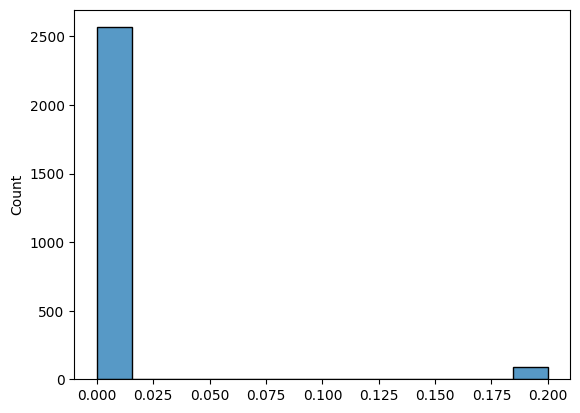

In [59]:
import seaborn as sns
sns.histplot(df.apply(lambda df: df.isnull().sum()/len(df), axis=1))

## Roy Data 2


In [86]:
hash_rate = pd.read_csv('/Users/ireneberros/Documents/model/royData/royData2/bitcoin-mean-hash-rate.csv')

In [87]:
hash_rate['timestamp'] = hash_rate['timestamp'].apply(lambda x: x[0:10])
hash_rate['timestamp'] = pd.to_datetime(hash_rate['timestamp'])

hash_rate.columns = ['Date', 'hash_rate']
hash_rate = hash_rate[hash_rate['Date']>= '2016-01-01']

hash_rate

,Date,hash_rate
2548,2016-01-01,6.869991e+17
2549,2016-01-02,7.466684e+17
2550,2016-01-03,7.432371e+17
2551,2016-01-04,9.249701e+17
2552,2016-01-05,8.062655e+17
...,...,...
5234,2023-05-10,3.949628e+20
5235,2023-05-11,3.607090e+20
5236,2023-05-12,3.363455e+20
5237,2023-05-13,3.490126e+20


In [88]:
active_addre = pd.read_csv('/Users/ireneberros/Documents/model/royData/royData2/bitcoin-number-of-active-addresses.csv')

In [89]:
active_addre['timestamp'] = active_addre['timestamp'].apply(lambda x: x[0:10])
active_addre['timestamp'] = pd.to_datetime(active_addre['timestamp'])
active_addre.columns = ['Date', 'active_addre']
active_addre = active_addre[active_addre['Date']>= '2016-01-01']

active_addre

,Date,active_addre
2554,2016-01-01,316489
2555,2016-01-02,419389
2556,2016-01-03,394047
2557,2016-01-04,418253
2558,2016-01-05,434786
...,...,...
5240,2023-05-10,898884
5241,2023-05-11,836309
5242,2023-05-12,814124
5243,2023-05-13,728193


In [90]:
tran_sec = pd.read_csv('/Users/ireneberros/Documents/model/royData/royData2/bitcoin-number-of-transactions-per-second.csv')

In [91]:
tran_sec['timestamp'] = tran_sec['timestamp'].apply(lambda x: x[0:10])
tran_sec['timestamp'] = pd.to_datetime(tran_sec['timestamp'])
tran_sec.columns = ['Date', 'tran_sec']
tran_sec = tran_sec[tran_sec['Date']>= '2016-01-01']

tran_sec

,Date,tran_sec
2554,2016-01-01,1.434687
2555,2016-01-02,1.723299
2556,2016-01-03,1.648877
2557,2016-01-04,2.096910
2558,2016-01-05,2.108958
...,...,...
5240,2023-05-10,7.771968
5241,2023-05-11,6.324051
5242,2023-05-12,5.891412
5243,2023-05-13,6.660822


In [92]:
tran_num = pd.read_csv('/Users/ireneberros/Documents/model/royData/royData2/bitcoin-number-of-transactions.csv')

In [93]:
tran_num['timestamp'] = tran_num['timestamp'].apply(lambda x: x[0:10])
tran_num['timestamp'] = pd.to_datetime(tran_num['timestamp'])
tran_num.columns = ['Date', 'tran_num']
tran_num = tran_num[tran_num['Date']>= '2016-01-01']

tran_num

,Date,tran_num
2554,2016-01-01,123957
2555,2016-01-02,148893
2556,2016-01-03,142463
2557,2016-01-04,181173
2558,2016-01-05,182214
...,...,...
5240,2023-05-10,671498
5241,2023-05-11,546398
5242,2023-05-12,509018
5243,2023-05-13,575495


In [94]:
block_size = pd.read_csv('/Users/ireneberros/Documents/model/royData/royData2/bitcoin-total-block-size.csv')

In [95]:
block_size['timestamp'] = block_size['timestamp'].apply(lambda x: x[0:10])
block_size['timestamp'] = pd.to_datetime(block_size['timestamp'])
block_size.columns = ['Date', 'block_size']
block_size = block_size[block_size['Date']>= '2016-01-01']

block_size

,Date,block_size
2548,2016-01-01,66609963
2549,2016-01-02,84062840
2550,2016-01-03,80425082
2551,2016-01-04,100811640
2552,2016-01-05,100759295
...,...,...
5234,2023-05-10,285791907
5235,2023-05-11,262347279
5236,2023-05-12,235499635
5237,2023-05-13,247496911


In [96]:
rev_all_miners = pd.read_csv('/Users/ireneberros/Documents/model/royData/royData2/bitcoin-total-miner-revenue-btc-all-miners.csv')

In [97]:
rev_all_miners['timestamp'] = rev_all_miners['timestamp'].apply(lambda x: x[0:10])
rev_all_miners['timestamp'] = pd.to_datetime(rev_all_miners['timestamp'])
rev_all_miners.columns = ['Date', 'rev_all_miners']
rev_all_miners = rev_all_miners[rev_all_miners['Date']>= '2016-01-01']

rev_all_miners

,Date,rev_all_miners
2554,2016-01-01,3394.820806
2555,2016-01-02,3656.376005
2556,2016-01-03,3649.083049
2557,2016-01-04,4555.746843
2558,2016-01-05,3957.278467
...,...,...
5240,2023-05-10,1402.267719
5241,2023-05-11,1138.128122
5242,2023-05-12,1054.693426
5243,2023-05-13,1015.039977


In [98]:
block_reward = pd.read_csv('/Users/ireneberros/Documents/model/royData/royData2/bitcoin-total-miner-revenue-from-block-rewards-btc-all-miners.csv')

In [99]:
block_reward['timestamp'] = block_reward['timestamp'].apply(lambda x: x[0:10])
block_reward['timestamp'] = pd.to_datetime(block_reward['timestamp'])
block_reward.columns = ['Date', 'block_reward']
block_reward = block_reward[block_reward['Date']>= '2016-01-01']

block_reward

,Date,block_reward
2554,2016-01-01,3375.00
2555,2016-01-02,3625.00
2556,2016-01-03,3625.00
2557,2016-01-04,4525.00
2558,2016-01-05,3925.00
...,...,...
5240,2023-05-10,1062.50
5241,2023-05-11,943.75
5242,2023-05-12,881.25
5243,2023-05-13,906.25


In [100]:
size_tran = pd.read_csv('/Users/ireneberros/Documents/model/royData/royData2/bitcoin-total-size-of-transactions.csv')

In [101]:
size_tran['timestamp'] = size_tran['timestamp'].apply(lambda x: x[0:10])
size_tran['timestamp'] = pd.to_datetime(size_tran['timestamp'])
size_tran.columns = ['Date', 'size_tran']
size_tran = size_tran[size_tran['Date']>= '2016-01-01']

size_tran

,Date,size_tran
2545,2016-01-01,66570062
2546,2016-01-02,84021661
2547,2016-01-03,80388881
2548,2016-01-04,100770969
2549,2016-01-05,100702961
...,...,...
5231,2023-05-10,285732572
5232,2023-05-11,262293595
5233,2023-05-12,235448890
5234,2023-05-13,247444720


In [111]:
trans_fees = pd.read_csv('/Users/ireneberros/Documents/model/royData/royData2/bitcoin-total-transaction-fees-btc.csv')

In [112]:
trans_fees['timestamp'] = trans_fees['timestamp'].apply(lambda x: x[0:10])
trans_fees['timestamp'] = pd.to_datetime(trans_fees['timestamp'])
trans_fees.columns = ['Date', 'trans_fees']
trans_fees = trans_fees[trans_fees['Date']>= '2016-01-01']

trans_fees

,Date,trans_fees
2554,2016-01-01,19.820806
2555,2016-01-02,31.376005
2556,2016-01-03,24.083049
2557,2016-01-04,30.746843
2558,2016-01-05,32.278467
...,...,...
5240,2023-05-10,339.767719
5241,2023-05-11,194.378122
5242,2023-05-12,173.443426
5243,2023-05-13,108.789977


In [116]:
nacho = pd.read_excel('/Users/ireneberros/Documents/model/royData/royData2/PerformanceGraphExport-3.xls', skiprows=6)

In [117]:
nacho['Effective date '] = pd.to_datetime(nacho['Effective date '])
nacho.columns = ['Date', 'nacho']
nacho = nacho[nacho['Date']>= '2016-01-01']

nacho

,Date,nacho
675,2016-01-04,320.48
676,2016-01-05,320.47
677,2016-01-06,315.26
678,2016-01-07,304.34
679,2016-01-08,298.17
...,...,...
2523,2023-05-08,388.07
2524,2023-05-09,387.49
2525,2023-05-10,384.89
2526,2023-05-11,382.28


In [118]:
#join month data

join1 = hash_rate.merge(active_addre, on='Date', how='left')
join2 = join1.merge(tran_sec, on='Date', how='left')
join3 = join2.merge(tran_num, on='Date', how='left')
join4 = join3.merge(block_size, on='Date', how='left')
join5 = join4.merge(rev_all_miners, on='Date', how='left')
join6 = join5.merge(block_reward, on='Date', how='left')
join7 = join6.merge(size_tran, on='Date', how='left')
join8 = join7.merge(trans_fees, on='Date', how='left')
join9 = join8.merge(nacho, on='Date', how='left')


In [121]:
join9.to_csv('/Users/ireneberros/Documents/model/royData/royData2/on_chain_roy.csv', index=False)

In [120]:
join9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2691 entries, 0 to 2690
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2691 non-null   datetime64[ns]
 1   hash_rate       2691 non-null   float64       
 2   active_addre    2691 non-null   int64         
 3   tran_sec        2691 non-null   float64       
 4   tran_num        2691 non-null   int64         
 5   block_size      2691 non-null   int64         
 6   rev_all_miners  2691 non-null   float64       
 7   block_reward    2691 non-null   float64       
 8   size_tran       2691 non-null   int64         
 9   trans_fees      2691 non-null   float64       
 10  nacho           1853 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 252.3 KB


## Paper

In [110]:
import pandas as pd

def merge_csv_from_txt(txt_file):
    # Leer el archivo de texto con los nombres de los archivos CSV
    with open(txt_file, 'r') as file:
        csv_files = file.read().splitlines()

    # Crear un DataFrame vacío para almacenar el resultado del merge
    merged_df = pd.DataFrame()

    # Leer y procesar cada archivo CSV
    for csv_file in csv_files:

        path = '../model/Variables/' + csv_file
        csv_name = csv_file.split('.')[0]

        # Leer el archivo CSV y convertir la columna "timestamp" a datetime
        df = pd.read_csv(path)
        df['timestamp'] = pd.to_datetime(df['timestamp'])

        # Cambiar el nombre de la columna "value"
        df = df.rename(columns={'value': csv_name})

        # Realizar el merge basado en la columna "timestamp"
        if merged_df.empty:
            merged_df = df
        else:
            merged_df = merged_df.merge(df, on='timestamp', how='outer')

    return merged_df


In [111]:
csv = '../model/data/csvs.txt'

In [112]:
merged_data = merge_csv_from_txt(csv)

In [113]:
merged_data

,timestamp,bitcoin-aggregate-security-spend-thermocap-usd,bitcoin-balanced-price-usd,bitcoin-block-height,bitcoin-circulating-supply-btc,bitcoin-cumulative-value-days-destroyed-cvdd,bitcoin-delta-cap-usd,bitcoin-investor-capitalization,bitcoin-market-cap-usd,bitcoin-market-value-to-realized-value-ratio-mvrv,...,bitcoin-percent-of-supply-last-active-3-years-ago,bitcoin-price-drawdown-from-ath,bitcoin-realized-cap-usd,bitcoin-realized-price-usd,bitcoin-relative-unrealized-profit,daysTillHalving,price,ratio,bitcoin-total-supply-last-active-3y-5y-btc,bitcoin-total-supply-last-active-5y-7y-btc
0,2010-07-18 00:00:00+00:00,170820.081484,0.049586,68951.0,3447600.0,0.000029,-61976.889248,306.466267,295941.984000,1.729375,...,0.0,-0.000116,171126.547752,0.049636,0.421756,864.0,0.085840,1.558666e-01,0.0,0.0
1,2010-07-19 00:00:00+00:00,171609.965832,0.049960,69125.0,3456300.0,0.000040,-75574.519738,1307.485763,279269.040000,1.615043,...,0.0,-0.131836,172917.451595,0.050030,0.381980,863.0,0.080800,1.566214e-01,0.0,0.0
2,2010-07-20 00:00:00+00:00,172330.083036,0.050090,69306.0,3465350.0,0.000042,-77281.444918,1501.739712,258977.156667,1.489814,...,0.0,-0.197020,173831.822749,0.050163,0.331170,862.0,0.074733,1.573758e-01,0.0,0.0
3,2010-07-21 00:00:00+00:00,173058.047879,0.050155,69513.0,3475700.0,0.000061,-81263.004405,1631.601249,275310.197000,1.575996,...,0.0,-0.148920,174689.649129,0.050260,0.366785,861.0,0.079210,1.582583e-01,0.0,0.0
4,2010-07-22 00:00:00+00:00,173656.539333,0.050123,69689.0,3484500.0,0.000066,-70734.860459,1392.536903,194940.352500,1.113633,...,0.0,-0.398893,175049.076236,0.050236,0.111389,860.0,0.055945,1.589034e-01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,2028-05-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1422.0,NaN,1.587731e+06,NaN,NaN
7067,2028-05-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1421.0,NaN,1.595385e+06,NaN,NaN
7068,2028-05-11 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1420.0,NaN,1.603086e+06,NaN,NaN
7069,2028-05-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1419.0,NaN,1.610835e+06,NaN,NaN


In [114]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071 entries, 0 to 7070
Data columns (total 33 columns):
 #   Column                                             Non-Null Count  Dtype              
---  ------                                             --------------  -----              
 0   timestamp                                          7071 non-null   datetime64[ns, UTC]
 1   bitcoin-aggregate-security-spend-thermocap-usd     4683 non-null   float64            
 2   bitcoin-balanced-price-usd                         4684 non-null   float64            
 3   bitcoin-block-height                               5238 non-null   float64            
 4   bitcoin-circulating-supply-btc                     5244 non-null   float64            
 5   bitcoin-cumulative-value-days-destroyed-cvdd       4684 non-null   float64            
 6   bitcoin-delta-cap-usd                              4684 non-null   float64            
 7   bitcoin-investor-capitalization                    4683 non-

In [115]:
merged_data.drop(['daysTillHalving', 'price'], axis=1, inplace=True)

In [116]:
merged_data.rename(columns = {'ratio':'bitcoin-stock-to-flow-ratio-usd'}, inplace=True)

In [117]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071 entries, 0 to 7070
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype              
---  ------                                             --------------  -----              
 0   timestamp                                          7071 non-null   datetime64[ns, UTC]
 1   bitcoin-aggregate-security-spend-thermocap-usd     4683 non-null   float64            
 2   bitcoin-balanced-price-usd                         4684 non-null   float64            
 3   bitcoin-block-height                               5238 non-null   float64            
 4   bitcoin-circulating-supply-btc                     5244 non-null   float64            
 5   bitcoin-cumulative-value-days-destroyed-cvdd       4684 non-null   float64            
 6   bitcoin-delta-cap-usd                              4684 non-null   float64            
 7   bitcoin-investor-capitalization                    4683 non-

In [118]:

merged_data['timestamp'] = merged_data['timestamp'].apply(lambda x: str(x)[0:10])
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

In [119]:
merged_data = merged_data.loc[(merged_data['timestamp']>'2016-01-01')&(merged_data['timestamp']<'2023-05-09')]

In [120]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2684 entries, 1994 to 4677
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   timestamp                                          2684 non-null   datetime64[ns]
 1   bitcoin-aggregate-security-spend-thermocap-usd     2684 non-null   float64       
 2   bitcoin-balanced-price-usd                         2684 non-null   float64       
 3   bitcoin-block-height                               2684 non-null   float64       
 4   bitcoin-circulating-supply-btc                     2684 non-null   float64       
 5   bitcoin-cumulative-value-days-destroyed-cvdd       2684 non-null   float64       
 6   bitcoin-delta-cap-usd                              2684 non-null   float64       
 7   bitcoin-investor-capitalization                    2684 non-null   float64       
 8   bitcoin-market-

In [121]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2684 entries, 1994 to 4677
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   timestamp                                          2684 non-null   datetime64[ns]
 1   bitcoin-aggregate-security-spend-thermocap-usd     2684 non-null   float64       
 2   bitcoin-balanced-price-usd                         2684 non-null   float64       
 3   bitcoin-block-height                               2684 non-null   float64       
 4   bitcoin-circulating-supply-btc                     2684 non-null   float64       
 5   bitcoin-cumulative-value-days-destroyed-cvdd       2684 non-null   float64       
 6   bitcoin-delta-cap-usd                              2684 non-null   float64       
 7   bitcoin-investor-capitalization                    2684 non-null   float64       
 8   bitcoin-market-

In [122]:
merged_data.to_csv('../model/data/on_chain_paper.csv', index=False)